#### Import libraries

In [1]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


##### Read csv

In [2]:
df = pd.read_csv('iris.csv') 

#### Neural Networks Implementation

In [3]:
X = df.drop(columns='species')
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Creating the model

In [4]:
NN = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, activation='relu',
                   learning_rate='constant', learning_rate_init=0.04, random_state=42)

NN.fit(X_train, y_train)

,hidden_layer_sizes,"(5,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.04
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


#### Evaluate the models

Accuracy: 1.0


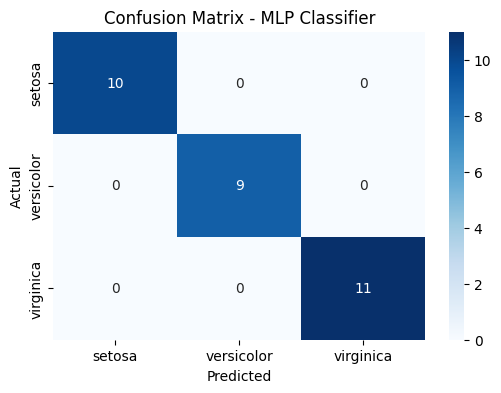

In [5]:
y_pred = NN.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=NN.classes_, yticklabels=NN.classes_)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Hyperparametertuning

In [6]:
param_grid = {
    'hidden_layer_sizes': [(50,), (75,), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=500, random_state=42),
                           param_grid=param_grid, n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}


Best Model Accuracy: 0.9666666666666667


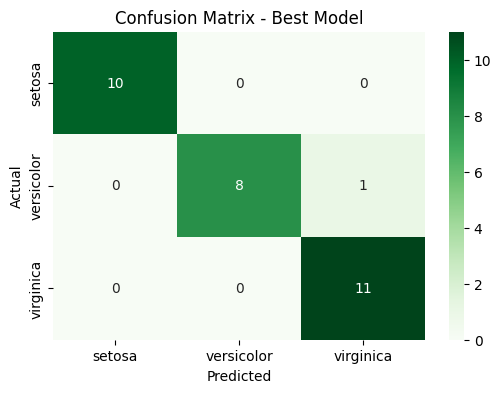

In [7]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", metrics.accuracy_score(y_test, y_pred_best))

# Confusion matrix for best model
plt.figure(figsize=(6,4))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()